In [1]:
print("Hello World")

Hello World


In [2]:
from google.colab import drive
import shutil
import os
shutil.rmtree('/content/drive', ignore_errors=True)
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import kagglehub
path = kagglehub.dataset_download("aryashah2k/indian-medicinal-leaves-dataset")
print("Path to dataset files:", path)

100%|██████████| 9.00G/9.00G [01:23<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aryashah2k/indian-medicinal-leaves-dataset/versions/1


In [4]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [5]:
source_path = '/root/.cache/kagglehub/datasets/aryashah2k/indian-medicinal-leaves-dataset/versions/1'

# Destination path (e.g., your Google Drive)
destination_path = '/content/drive/MyDrive/medicinal_plant_datasets/my_dataset1'

# Ensure the source path exists
if not os.path.exists(source_path):
    print(f"Source path {source_path} does not exist.")
else:
    # Remove the destination directory if it exists
    if os.path.exists(destination_path):
        shutil.rmtree(destination_path)  # Remove the destination directory

    # Copy the dataset files
    shutil.copytree(source_path, destination_path)
    print(f"Dataset copied from {source_path} to {destination_path}")

Dataset copied from /root/.cache/kagglehub/datasets/aryashah2k/indian-medicinal-leaves-dataset/versions/1 to /content/drive/MyDrive/medicinal_plant_datasets/my_dataset1


In [11]:
import os
import shutil

# Path to the segmented images folder
dataset_path = '/content/drive/MyDrive/medicinal_plant_datasets/my_dataset1/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'

# List of folders to keep
folders_to_keep = [
    'Tulsi', 'Tamarind', 'Curry', 'Palak(Spinach)', 'Doddpathre',
    'Mint', 'Papaya', 'Catharanthus', 'Neem', 'Castor'
]

# Loop through each class folder (plant species) in the segmented_images1 folder
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    # If the folder is not in the 'folders_to_keep' list, delete it
    if os.path.isdir(class_folder) and class_name not in folders_to_keep:
        try:
            shutil.rmtree(class_folder)  # Deletes the folder and its contents
            print(f"Deleted folder: {class_name}")
        except Exception as e:
            print(f"Error deleting folder {class_name}: {e}")

print("Cleanup process completed!")


Deleted folder: Bamboo
Deleted folder: Pumpkin
Deleted folder: Ganike
Deleted folder: Parijatha
Deleted folder: Aloevera
Deleted folder: Raddish
Deleted folder: Sampige
Deleted folder: ashoka
Deleted folder: Nelavembu
Deleted folder: Honge
Deleted folder: Kasambruga
Deleted folder: Globe Amarnath
Deleted folder: Jackfruit
Deleted folder: Tomato
Deleted folder: Gasagase
Deleted folder: Insulin
Deleted folder: Balloon_Vine
Deleted folder: Lemongrass
Deleted folder: Ginger
Deleted folder: Kohlrabi
Deleted folder: Seethaashoka
Deleted folder: Spinach1
Deleted folder: Marigold
Deleted folder: Pomoegranate
Deleted folder: Jasmine
Deleted folder: Caricature
Deleted folder: Chilly
Deleted folder: Drumstick
Deleted folder: Eucalyptus
Deleted folder: Badipala
Deleted folder: Coffee
Deleted folder: Coriender
Deleted folder: Guava
Deleted folder: Lemon
Deleted folder: Chakte
Deleted folder: camphor
Deleted folder: Seethapala
Deleted folder: Citron lime (herelikai)
Deleted folder: Pepper
Deleted fo

In [12]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Function to apply the segmentation process
def segment_plant_leaf(image_path, save_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range (adjust if needed)
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Create a binary mask
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply mask to the image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Convert black background to transparent
    rgba = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    rgba[:, :, 3] = mask  # Alpha channel comes from mask

    # Save the output
    cv2.imwrite(save_path, rgba)

# Set the root directory for the medicinal leaf dataset
dataset_root = '/content/drive/MyDrive/medicinal_plant_datasets/my_dataset1/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'
output_root = '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1'

# Create the main segmented images folder
os.makedirs(output_root, exist_ok=True)

# Loop through all the subdirectories (each plant category) inside the Medicinal Leaf dataset
for folder_name in os.listdir(dataset_root):
    folder_path = os.path.join(dataset_root, folder_name)

    if os.path.isdir(folder_path):
        # Create an output folder for each plant class inside 'segmented_images'
        output_folder = os.path.join(output_root, folder_name)
        os.makedirs(output_folder, exist_ok=True)

        # Process each image in the folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                save_path = os.path.join(output_folder, image_name)
                segment_plant_leaf(image_path, save_path)

print("Segmentation process completed for all images!")

Segmentation process completed for all images!


In [13]:
segmented_dir = '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1'

In [14]:
import os

# Path to the segmented images directory
dataset_path = segmented_dir

# Folders to keep
folders_to_keep = ['Tulsi', 'Tamarind', 'Curry', 'Palak(Spinach)', 'Doddpathre',
                   'Mint', 'Papaya', 'Catharanthus', 'Neem', 'Castor']

# Dictionary to hold class names and their respective image counts
image_counts = {}

# Loop through each class folder (plant species)
for class_name in os.listdir(dataset_path):
    if class_name in folders_to_keep:  # Only process the folders in folders_to_keep
        class_folder = os.path.join(dataset_path, class_name)

        if os.path.isdir(class_folder):  # Ensure it's a directory
            # Get all image files in the subfolder (can include .jpg, .jpeg, .png etc.)
            image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            # Count the number of images in this class
            image_counts[class_name] = len(image_files)

# Display the image counts for each of the selected folders
print("Image count in the selected folders:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} images")


Image count in the selected folders:
Mint: 135 images
Palak(Spinach): 149 images
Curry: 168 images
Tulsi: 177 images
Castor: 129 images
Neem: 132 images
Tamarind: 176 images
Catharanthus: 134 images
Doddpathre: 142 images
Papaya: 135 images


In [15]:
import os
import shutil
import random

# Path to the segmented images directory
dataset_path = segmented_dir
# Path to save the train and test split
split_base_path = '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1'

# Folders to keep
folders_to_keep = ['Tulsi', 'Tamarind', 'Curry', 'Palak(Spinach)', 'Doddpathre',
                   'Mint', 'Papaya', 'Catharanthus', 'Neem', 'Castor']

# Percentage split for train and test
train_percentage = 0.8
test_percentage = 0.2

# Ensure the split directories exist
os.makedirs(os.path.join(split_base_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(split_base_path, 'test'), exist_ok=True)

# Loop through each class folder (plant species)
for class_name in os.listdir(dataset_path):
    if class_name in folders_to_keep:  # Only process the folders in folders_to_keep
        class_folder = os.path.join(dataset_path, class_name)

        if os.path.isdir(class_folder):  # Ensure it's a directory
            # Get all image files in the subfolder (can include .jpg, .jpeg, .png etc.)
            image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            # Shuffle the images to randomize the split
            random.shuffle(image_files)

            # Calculate the split index
            split_index = int(len(image_files) * train_percentage)

            # Split the images into train and test
            train_images = image_files[:split_index]
            test_images = image_files[split_index:]

            # Create subdirectories for the class in train and test folders
            os.makedirs(os.path.join(split_base_path, 'train', class_name), exist_ok=True)
            os.makedirs(os.path.join(split_base_path, 'test', class_name), exist_ok=True)

            # Move the images to the train directory
            for img in train_images:
                src_path = os.path.join(class_folder, img)
                dst_path = os.path.join(split_base_path, 'train', class_name, img)
                shutil.move(src_path, dst_path)

            # Move the images to the test directory
            for img in test_images:
                src_path = os.path.join(class_folder, img)
                dst_path = os.path.join(split_base_path, 'test', class_name, img)
                shutil.move(src_path, dst_path)

print("Data split into train and test successfully!")


Data split into train and test successfully!


In [16]:
import os

# Path to the split dataset
split_base_path = '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1'

# Folders to keep
folders_to_keep = ['Tulsi', 'Tamarind', 'Curry', 'Palak(Spinach)', 'Doddpathre',
                   'Mint', 'Papaya', 'Catharanthus', 'Neem', 'Castor']

# Dictionary to store the counts
image_counts = {'train': {}, 'test': {}}

# Loop through each class folder (plant species) in both train and test
for split in ['train', 'test']:
    split_folder_path = os.path.join(split_base_path, split)

    for class_name in folders_to_keep:
        class_folder = os.path.join(split_folder_path, class_name)

        if os.path.isdir(class_folder):  # Ensure it's a directory
            # Get all image files in the subfolder (can include .jpg, .jpeg, .png etc.)
            image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            # Count the number of images
            image_counts[split][class_name] = len(image_files)

# Print the counts for train and test datasets
for split in ['train', 'test']:
    print(f"\n{split.capitalize()} dataset:")
    for class_name in image_counts[split]:
        print(f"  {class_name}: {image_counts[split][class_name]} images")



Train dataset:
  Tulsi: 141 images
  Tamarind: 140 images
  Curry: 134 images
  Palak(Spinach): 119 images
  Doddpathre: 113 images
  Mint: 108 images
  Papaya: 108 images
  Catharanthus: 107 images
  Neem: 105 images
  Castor: 103 images

Test dataset:
  Tulsi: 36 images
  Tamarind: 36 images
  Curry: 34 images
  Palak(Spinach): 30 images
  Doddpathre: 29 images
  Mint: 27 images
  Papaya: 27 images
  Catharanthus: 27 images
  Neem: 27 images
  Castor: 26 images


In [17]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [31]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 1178 images belonging to 10 classes.
Found 299 images belonging to 10 classes.


In [19]:
# train_dir = '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1/train'
# batch_size = 21
# img_height = 256
# img_width = 256
# train_ds = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

Found 1178 images belonging to 10 classes.


In [20]:
# test_dir = '/content/drive/MyDrive/medicinal_plant_datasets/segmented_data1/test'
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# test_ds = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

Found 299 images belonging to 10 classes.


In [32]:
print(train_generator.class_indices)

{'Castor': 0, 'Catharanthus': 1, 'Curry': 2, 'Doddpathre': 3, 'Mint': 4, 'Neem': 5, 'Palak(Spinach)': 6, 'Papaya': 7, 'Tamarind': 8, 'Tulsi': 9}


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze most layers, but allow the last few to be fine-tuned
for layer in base_model.layers[:-4]:  # Unfreeze last 4 layers
    layer.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes
])



In [34]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 7,475,978 (28.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [36]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)


In [37]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.1208 - loss: 2.4205 - val_accuracy: 0.4147 - val_loss: 1.8489 - learning_rate: 1.0000e-04
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3526 - loss: 1.8470 - val_accuracy: 0.5819 - val_loss: 1.2719 - learning_rate: 1.0000e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5573 - loss: 1.3177 - val_accuracy: 0.7023 - val_loss: 0.8505 - learning_rate: 1.0000e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6376 - loss: 1.0884 - val_accuracy: 0.8094 - val_loss: 0.6136 - learning_rate: 1.0000e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7126 - loss: 0.8806 - val_accuracy: 0.8227 - val_loss: 0.5585 - learning_rate: 1.0000e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7426 - loss: 0.7440 - val_accuracy: 0.8528 - val_loss: 0.5159 - learning_rate: 1.0000e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7854 - loss

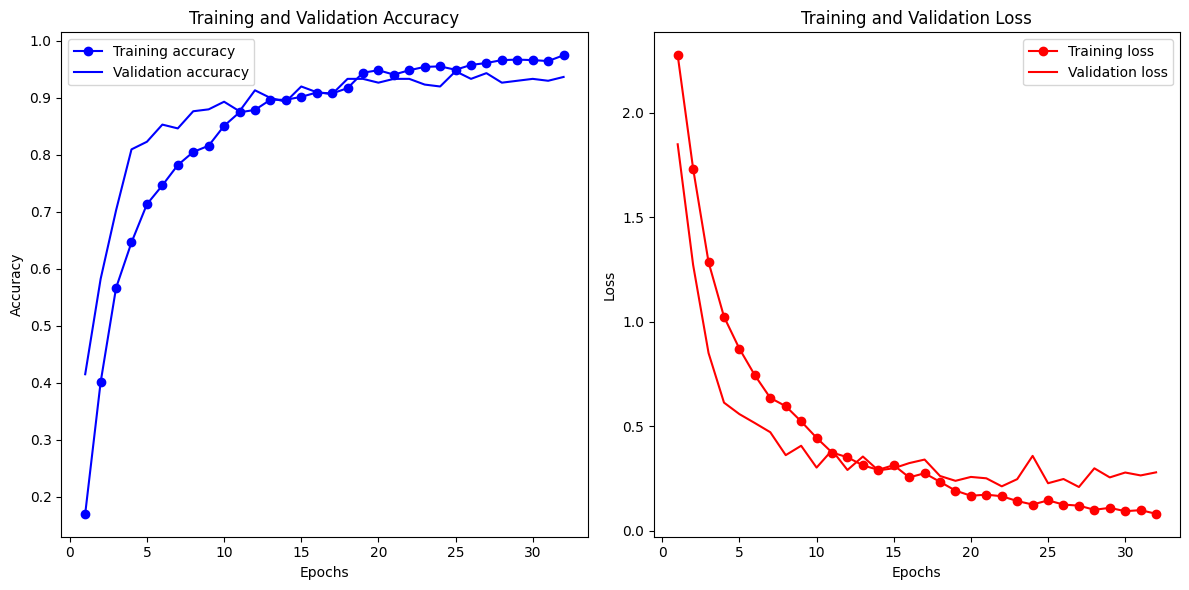

In [38]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model training
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 525ms/step


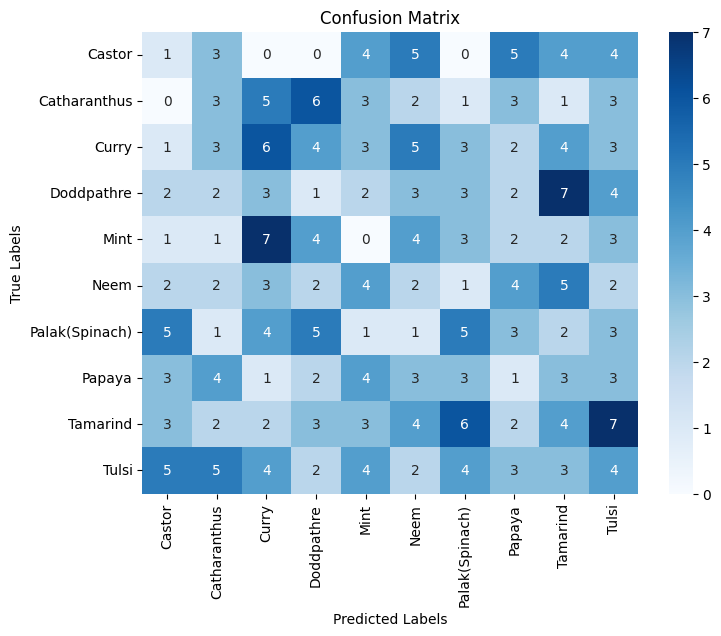

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the labels on the test dataset
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
y_true = test_ds.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_ds.class_indices, yticklabels=test_ds.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [41]:
# Saving the model
model.save('C:\Medicinal_Plant/KARTHIK_model.h5')

In [42]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create a directory in Google Drive if it doesn't exist
model_save_path = '/content/drive/MyDrive/saved_models'
os.makedirs(model_save_path, exist_ok=True)

# Save the model to Google Drive
model.save(os.path.join(model_save_path, 'my_model.h5'))

print(f'Model saved to {os.path.join(model_save_path, "my_model.h5")}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/saved_models/my_model.h5


In [44]:
model.save('/content/my_model.h5')  # Saves it in Colab's temporary local storage

In [45]:
from google.colab import files
files.download('/content/my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>